<a href="https://colab.research.google.com/github/dipakkumargupta/Dipak/blob/main/Airbnb_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC Airbnb: Exploratory Data Analysis**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

Airbnb helps those who need a place to stay and those who have a home to rent connect. Since it has achieved such success and popularity, the majority of us now think about using Airbnb when we vacation.
The price of a location is largely determined by a number of variables. It is required of hosts to post a fair price for their accommodations.

On the other side, consumers looking for lodging assess the listings based on a number of characteristics, including size, location, amenities, and—most importantly—price.

In [ ]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

# 2. Exploratory Data Analysis


*   Examine the number of variable and columns
*   Check that the dataset is tidy
    1.  Check that every row is an observation and every column is a variable
    2.  Determine if there are missing values

*   Examine variables distribution

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
es# Determine the number of missing values for every column
data.isnull().sum()

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
data.fillna({'reviews_per_month':0}, inplace=True)

In [ ]:
#examine the dataset
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
# Exclude property with listed price of 0
data = data.loc[data['price'] > 0]
# data_copy = data.copy()

In [ ]:
#examine the dataset
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

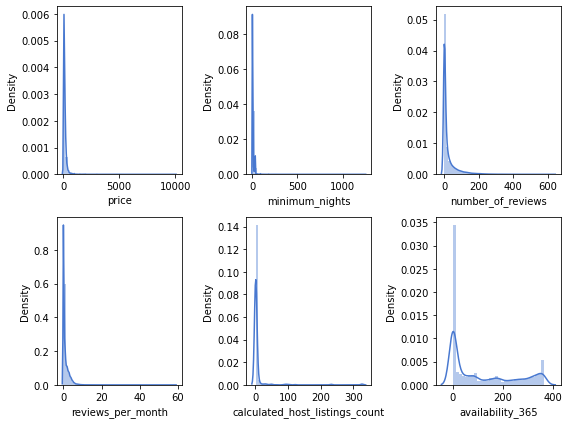

In [ ]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

In [ ]:
data[data['price'] >9000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,0.00,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,0.00,1,365


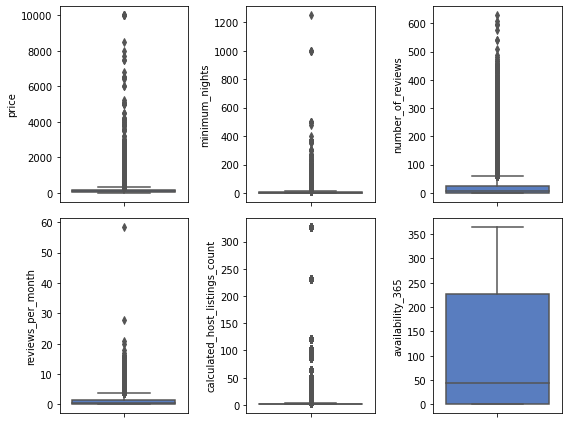

In [ ]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


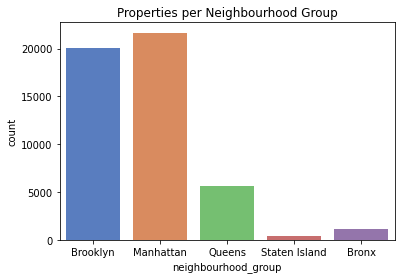

In [ ]:
title = 'Properties per Neighbourhood Group'
sns.countplot(data['neighbourhood_group'])
plt.title(title)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


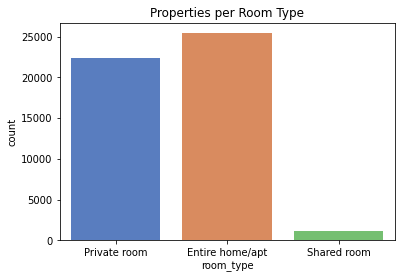

In [ ]:
title = 'Properties per Room Type'
sns.countplot(data['room_type'])
plt.title(title)
plt.ioff()

## 3. Visualization

*   Examine relation between location and price
*   Examine relation between room type and price

## 3.1 Correlation

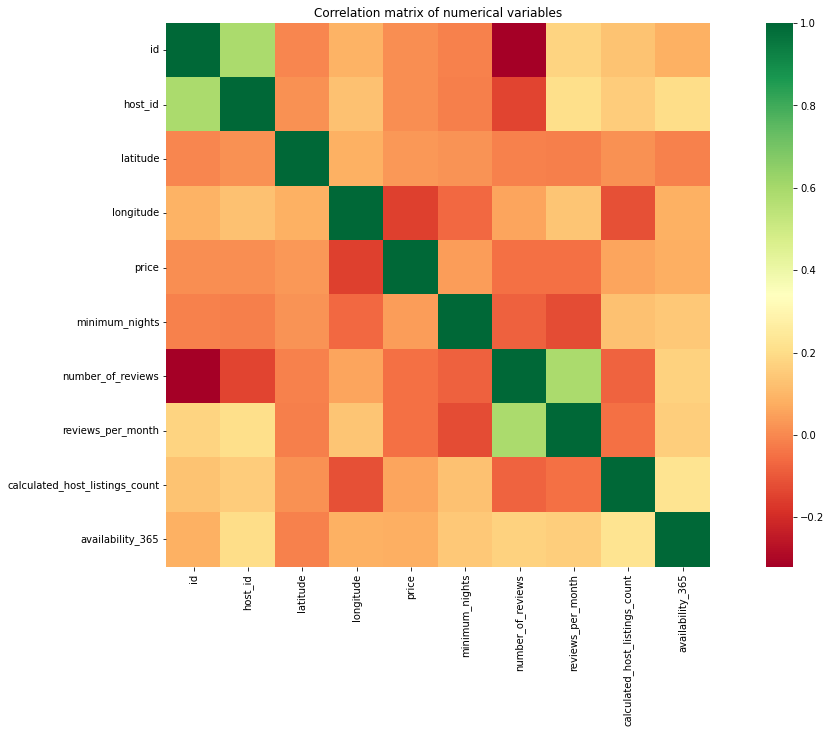

In [ ]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

# 3.2 Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


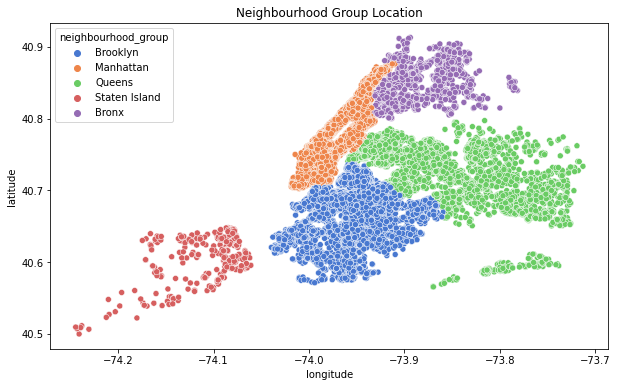

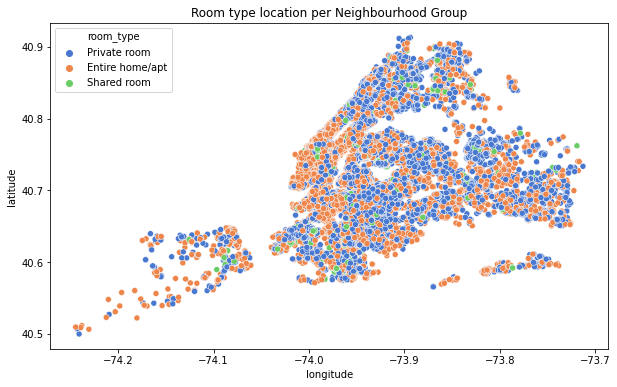

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type).set_title(title)
plt.ioff()

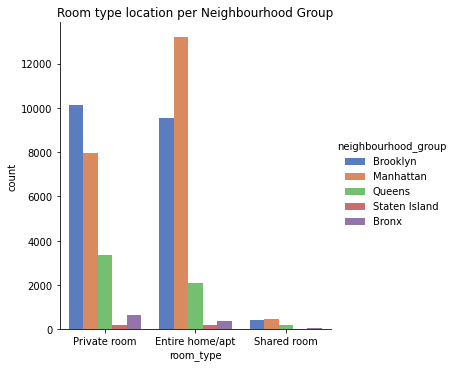

In [ ]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.ioff()


*   Properties in Manhattan are more expensive
*   The dataset can be separate between low price and high price propertie

# 3.4 Price relation to Room Type

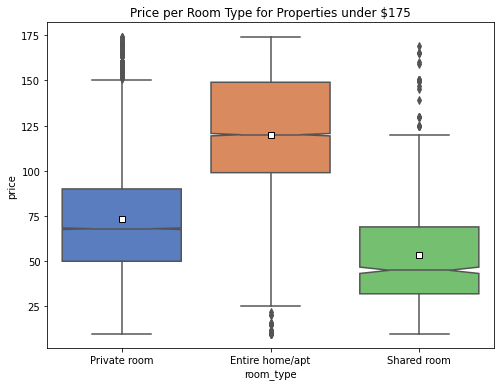

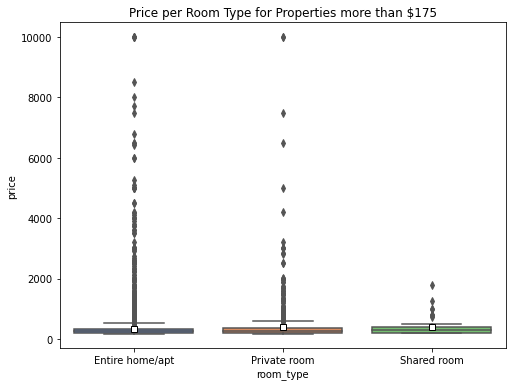

In [ ]:
title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

# 3.5 Price relation to the number of review per month

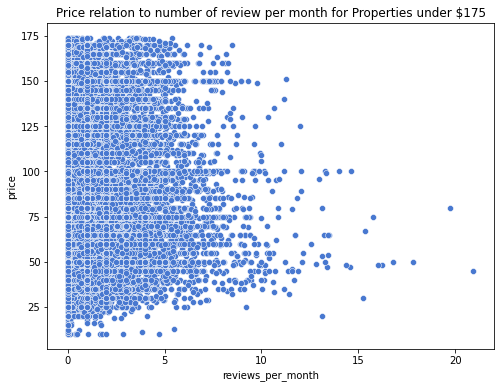

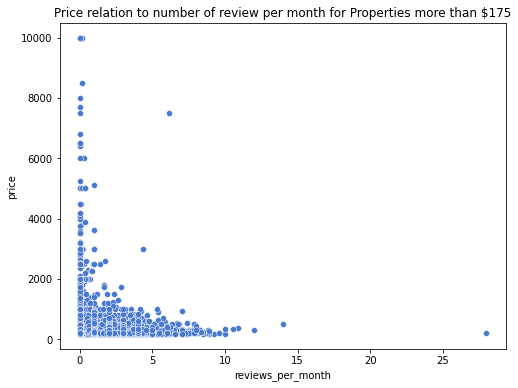

In [ ]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

Exploration of Neighbourhood Group

The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

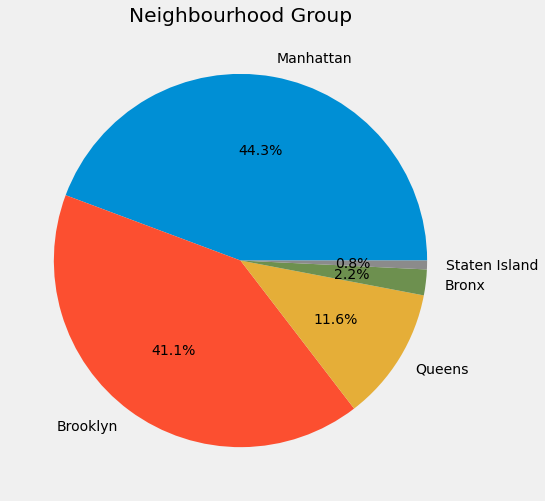

In [ ]:
# Neighbourhood Group 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,8))
plt.title("Neighbourhood Group")
g = plt.pie(data.neighbourhood_group.value_counts(),labels=data.neighbourhood_group.value_counts().index,autopct="%1.1f%%")
plt.show()

Exploring on Number of reviews

In [ ]:
# Lets focus on the last Colums that is "number_of_reviews"
# Lets find out the 20 most rerviewd cities in the NYC
top_reviewed = data.nlargest(20,'number_of_reviews')
top_reviewed

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [ ]:
 # Finding out the Average price per Night
average_price = top_reviewed.price.mean()
print('Average price per night: {}'.format(average_price))

Average price per night: 91.45


There is no need to depict this because a table would be the most readable format. From this table we can observe that top 20 most reviewed listing on AirBnB has average price of $ 91.